<h1><b>Intern : Yash</h1></b>

<h1><b>DATA SCIENCE AND BUSINESS ANALYTICS Intern at The Sparks Foundation</b></h1>

<h1><b>
Task 2:Prediction using Unsupervised Learning</b></h1>

1. Importing the packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Reading the Iris.csv data set

In [2]:
iris = pd.read_csv("Iris.csv")

3. Print the top 5 rows

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


4. print the sum of null values in data set

In [4]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

5. Print the correlation

In [5]:
iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


6. Describe the data set

In [6]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


7. Draw a heat map of correlation of data set

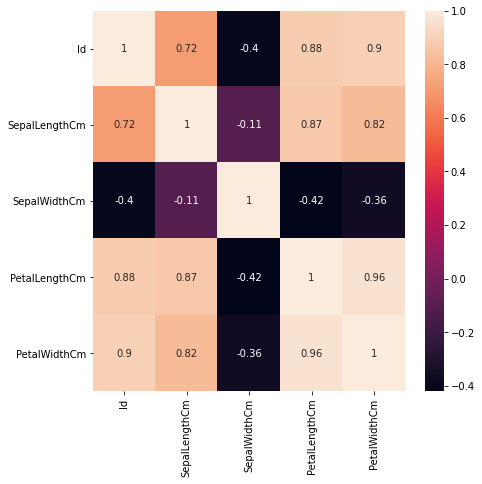

In [7]:
plt.figure(figsize=(7,7))
sns.heatmap(data = iris.corr(),annot=True)

8. Store the data into X and y variable.

In [8]:
X = iris.drop(['Id','Species'], axis=1)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
y = iris['Species']

9. Preprocessing the data into categorical form.

In [10]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y = label.fit_transform(y)

In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

10. Using the KMeans cluster algorithm.

In [12]:
from sklearn.cluster import KMeans

In [13]:
clusters = []

11. Trainin the data into different clusters.

In [14]:
for i in range(1,10):
  kmeans  = KMeans(n_clusters = i, random_state = 1)
  kmeans.fit(X)
  clusters.append(kmeans.inertia_)

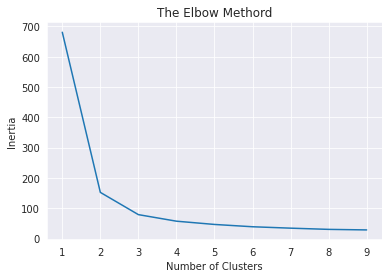

In [15]:
sns.set_style("darkgrid")
plt.plot(range(1,10),clusters)
plt.title('The Elbow Methord')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

12. Here k = 3 is the optimum cluster for over data set

In [16]:
model= KMeans(n_clusters = 3, random_state = 1)
y_pred = model.fit_predict(X)
x=X.values

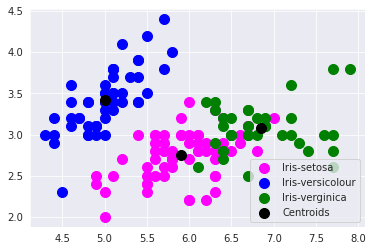

In [17]:
# visualizing the clusters- On the first two columns
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'magenta', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], s = 100, c = 'green', label = 'Iris-verginica')

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=100, c = 'black', label = 'Centroids')
plt.legend()
plt.show()